In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
filename = 'covid_19_clean_complete.csv'

In [4]:
df = pd.read_csv(filename, parse_dates=True)

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
pd.set_option('float_format', '{:.3f}'.format)
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000,49068.000,49068.000,49068.000,49068.000,49068.000
mean,21.434,23.528,16884.904,884.179,7915.713,8085.012
std,24.950,70.443,127300.205,6313.584,54800.919,76258.903
min,-51.796,-135.000,0.000,0.000,0.000,-14.000
25%,7.873,-15.310,4.000,0.000,0.000,0.000
50%,23.634,21.745,168.000,2.000,29.000,26.000
75%,41.204,80.772,1518.250,30.000,666.000,606.000
max,71.707,178.065,4290259.000,148011.000,1846641.000,2816444.000


In [7]:
df.describe(include=['object'])


,Province/State,Country/Region,Date,WHO Region
count,14664,49068,49068,49068
unique,78,187,188,6
top,Australian Capital Territory,China,2020-01-22,Europe
freq,188,6204,261,15040


In [8]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
df['Province/State'] = df['Province/State'].fillna('')
df.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

# **EDA**

In [10]:
import plotly.express as px

In [11]:
confirmed_cases = df.groupby('Country/Region')['Confirmed'].sum().reset_index()
confirmed_cases

,Country/Region,Confirmed
0,Afghanistan,1936390
1,Albania,196702
2,Algeria,1179755
3,Andorra,94404
4,Angola,22662
...,...,...
182,West Bank and Gaza,233461
183,Western Sahara,901
184,Yemen,67180
185,Zambia,129421


In [12]:
confirmed_cases = confirmed_cases.sort_values('Confirmed', ascending=False)[:20]
confirmed_cases

,Country/Region,Confirmed
173,US,224345948
23,Brazil,89524967
138,Russia,45408411
79,India,40883464
157,Spain,27404045
177,United Kingdom,26748587
85,Italy,26745145
61,France,21210926
65,Germany,21059152
81,Iran,19339267


In [13]:
fig = px.bar(confirmed_cases[::-1],
             x='Confirmed',
             y='Country/Region',
             title='Confirmed Cases Worldwide',
             text='Confirmed',
             height=900, orientation='h')
fig.show()

In [14]:
death_cases = df.groupby('Country/Region')['Deaths'].sum().reset_index().sort_values('Deaths', ascending=False)[:20]
death_cases

,Country/Region,Deaths
173,US,11011411
177,United Kingdom,3997775
23,Brazil,3938034
85,Italy,3707717
61,France,3048524
157,Spain,3033030
111,Mexico,1728277
79,India,1111831
81,Iran,1024136
16,Belgium,963679


In [15]:
fig = px.bar(death_cases[::-1],
             x='Deaths',
             y='Country/Region',
             title='Deaths Cases Worldwide',
             text='Deaths',
             height=900, orientation='h')
fig.show()

In [17]:
grouped = df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index().sort_values('Deaths', ascending=False)[:20]
grouped

,Country/Region,Confirmed,Deaths
173,US,224345948,11011411
177,United Kingdom,26748587,3997775
23,Brazil,89524967,3938034
85,Italy,26745145,3707717
61,France,21210926,3048524
157,Spain,27404045,3033030
111,Mexico,14946202,1728277
79,India,40883464,1111831
81,Iran,19339267,1024136
16,Belgium,6281116,963679


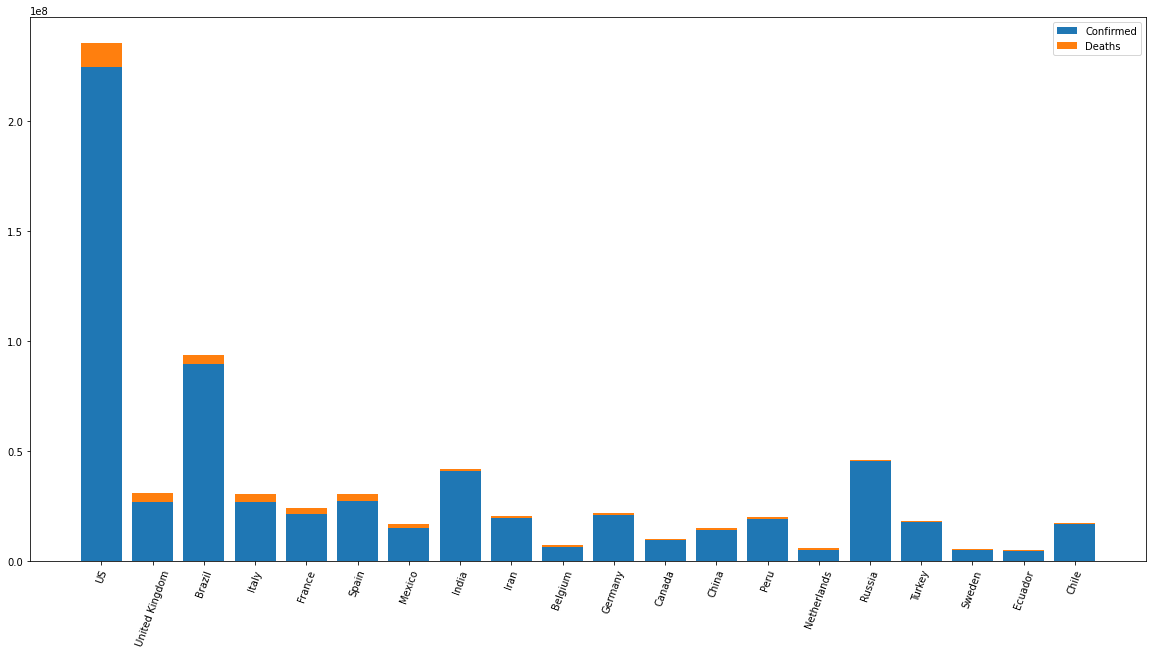

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(grouped['Country/Region'], grouped['Confirmed'], label='Confirmed')
plt.bar(grouped['Country/Region'], grouped['Deaths'], label='Deaths', bottom=grouped['Confirmed'])
plt.xticks(rotation=70)
plt.legend();

In [19]:
grouped['%_death'] = grouped['Deaths'] * 100 / grouped['Confirmed']
grouped = grouped.sort_values('%_death', ascending=False)
grouped

,Country/Region,Confirmed,Deaths,%_death
16,Belgium,6281116,963679,15.342
177,United Kingdom,26748587,3997775,14.946
61,France,21210926,3048524,14.372
85,Italy,26745145,3707717,13.863
120,Netherlands,5167516,622314,12.043
111,Mexico,14946202,1728277,11.563
157,Spain,27404045,3033030,11.068
161,Sweden,4973160,448913,9.027
32,Canada,9356551,699566,7.477
51,Ecuador,4678496,346618,7.409


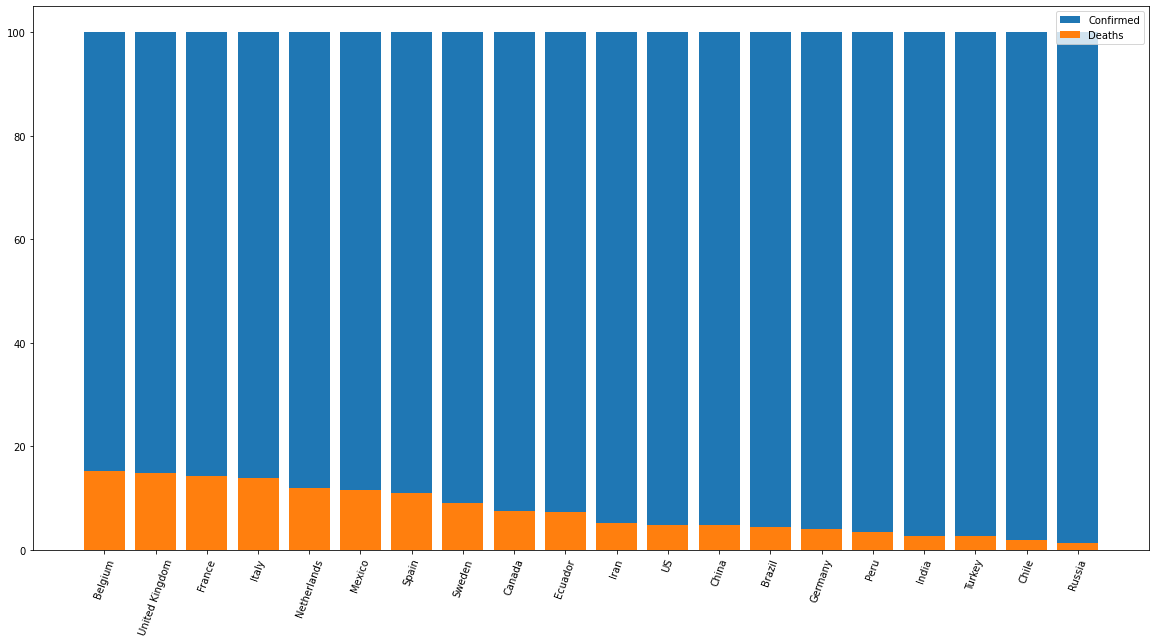

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(grouped['Country/Region'], 100, label='Confirmed')
plt.bar(grouped['Country/Region'], grouped['%_death'], label='Deaths')
plt.xticks(rotation=70)
plt.legend();

In [21]:
df.sort_values('Date')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean
166,Sint Maarten,Netherlands,18.043,-63.055,2020-01-22,0,0,0,0,Europe
167,,Netherlands,52.133,5.291,2020-01-22,0,0,0,0,Europe
168,,New Zealand,-40.901,174.886,2020-01-22,0,0,0,0,Western Pacific
169,,Nicaragua,12.865,-85.207,2020-01-22,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
48899,,Denmark,56.264,9.502,2020-07-27,13547,613,12417,517,Europe
48900,,Djibouti,11.825,42.590,2020-07-27,5059,58,4977,24,Eastern Mediterranean
48901,,Dominican Republic,18.736,-70.163,2020-07-27,64156,1083,30204,32869,Americas
48903,,Egypt,26.821,30.802,2020-07-27,92482,4652,34838,52992,Eastern Mediterranean


In [22]:
df['Country/Region'].value_counts()

China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: Country/Region, Length: 187, dtype: int64

In [23]:
df[df['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.826,117.226,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.182,116.414,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.057,107.874,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.079,117.987,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.752,104.286,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.305,117.323,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.693,88.092,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.113,85.240,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.974,101.487,2020-07-27,190,2,186,2,Western Pacific


In [25]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 54.2 MB/s 
     |████████████████████████████████| 6.3 MB 41.7 MB/s 


In [27]:
import geopandas as gpd

In [28]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
geo_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,geometry
0,,Afghanistan,33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean,POINT (67.70995 33.93911)
1,,Albania,41.153,20.168,2020-01-22,0,0,0,0,Europe,POINT (20.16830 41.15330)
2,,Algeria,28.034,1.660,2020-01-22,0,0,0,0,Africa,POINT (1.65960 28.03390)
3,,Andorra,42.506,1.522,2020-01-22,0,0,0,0,Europe,POINT (1.52180 42.50630)
4,,Angola,-11.203,17.874,2020-01-22,0,0,0,0,Africa,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...,...,...
49063,,Sao Tome and Principe,0.186,6.613,2020-07-27,865,14,734,117,Africa,POINT (6.61310 0.18640)
49064,,Yemen,15.553,48.516,2020-07-27,1691,483,833,375,Eastern Mediterranean,POINT (48.51639 15.55273)
49065,,Comoros,-11.646,43.333,2020-07-27,354,7,328,19,Africa,POINT (43.33330 -11.64550)
49066,,Tajikistan,38.861,71.276,2020-07-27,7235,60,6028,1147,Europe,POINT (71.27610 38.86100)


In [29]:
# plot the worldwide covid19
world_path_file = gpd.datasets.get_path('naturalearth_lowres') # upload natural data map
world = gpd.read_file(world_path_file)
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.000,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.500,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


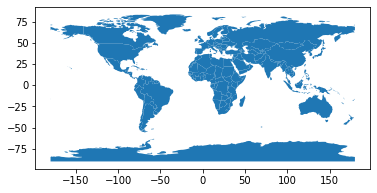

In [30]:
world.plot();

In [31]:
# in world, not in df
set(world.name.unique()) - set(df['Country/Region'].unique())

{'Antarctica',
 'Bosnia and Herz.',
 'Central African Rep.',
 'Congo',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Dominican Rep.',
 'Eq. Guinea',
 'Falkland Is.',
 'Fr. S. Antarctic Lands',
 'Macedonia',
 'Myanmar',
 'N. Cyprus',
 'New Caledonia',
 'North Korea',
 'Palestine',
 'Puerto Rico',
 'S. Sudan',
 'Solomon Is.',
 'Somaliland',
 'Taiwan',
 'Turkmenistan',
 'United States of America',
 'Vanuatu',
 'W. Sahara',
 'eSwatini'}

In [32]:
# in df, not in world
set(df['Country/Region'].unique()) - set(world.name.unique())

{'Andorra',
 'Antigua and Barbuda',
 'Bahrain',
 'Barbados',
 'Bosnia and Herzegovina',
 'Burma',
 'Cabo Verde',
 'Central African Republic',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Dominica',
 'Dominican Republic',
 'Equatorial Guinea',
 'Eswatini',
 'Grenada',
 'Holy See',
 'Liechtenstein',
 'Maldives',
 'Malta',
 'Mauritius',
 'Monaco',
 'North Macedonia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'South Sudan',
 'Taiwan*',
 'US',
 'West Bank and Gaza',
 'Western Sahara'}

In [33]:
world.loc[world['name'] == 'United States of America', 'name'] = 'US'

In [34]:
geo_merged = world.merge(geo_df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']] , 
                         left_on='name', right_on='Country/Region')

geo_merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Region,Confirmed,Deaths,Recovered
0,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0,0,0
1,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0,0,0
2,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0,0,0
3,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0,0,0
4,920938,Oceania,Fiji,FJI,8374.000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0,0,0
...,...,...,...,...,...,...,...,...,...,...
42483,1218208,North America,Trinidad and Tobago,TTO,43570.000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,141,8,128
42484,1218208,North America,Trinidad and Tobago,TTO,43570.000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,142,8,128
42485,1218208,North America,Trinidad and Tobago,TTO,43570.000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,147,8,128
42486,1218208,North America,Trinidad and Tobago,TTO,43570.000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,147,8,128


In [38]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CPU times: user 43.5 s, sys: 1.05 s, total: 44.6 s
Wall time: 57.5 s


Text(0.5, 1.0, 'SARS-Cov 2 in the worldwide')

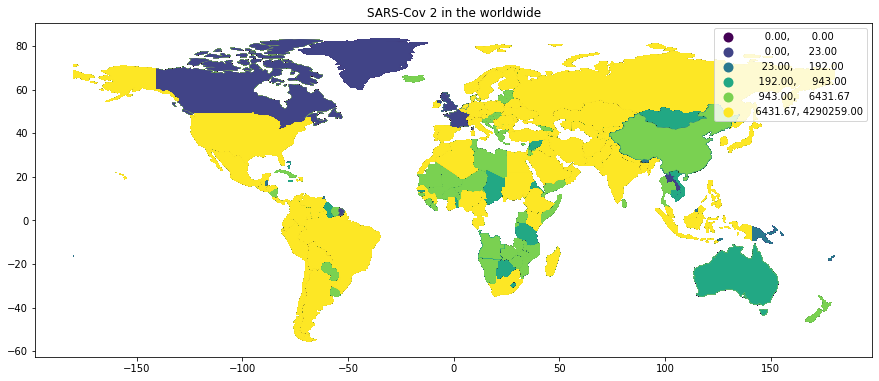

In [39]:
%%time
geo_merged.plot(column='Confirmed', legend=True, figsize=(15,9), scheme='quantiles', k=6)
plt.title('SARS-Cov 2 in the worldwide')

In [40]:
formated_gdf = df.groupby(['Date', 'Country/Region'])['Confirmed'].max()
formated_gdf = formated_gdf.reset_index()

formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)
formated_gdf

,Date,Country/Region,Confirmed,size
0,01/22/2020,Afghanistan,0,0.000
1,01/22/2020,Albania,0,0.000
2,01/22/2020,Algeria,0,0.000
3,01/22/2020,Andorra,0,0.000
4,01/22/2020,Angola,0,0.000
...,...,...,...,...
35151,07/27/2020,West Bank and Gaza,10621,16.138
35152,07/27/2020,Western Sahara,10,1.995
35153,07/27/2020,Yemen,1691,9.299
35154,07/27/2020,Zambia,4552,12.516


In [41]:
fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color=[0, 1500], 
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
fig.show()

In [42]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 133 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [43]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638782 sha256=39775adc705fa0ba0702a435eb56a256aafe9ea362b39223ec670bae0cc2afa0
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [45]:
df_uni = df.groupby('Date')['Confirmed'].sum().reset_index()
df_uni

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [46]:
df_uni.rename(columns={'Date': 'ds', 'Confirmed': 'y'}, inplace = True)
df_uni

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [47]:
val_split = "2020-06-01"

In [48]:
df_train = df_uni[df_uni['ds'] < val_split]
df_valid = df_uni[df_uni['ds'] >= val_split]

df_train.shape, df_valid.shape

((131, 2), (57, 2))

In [49]:
from fbprophet import Prophet
pro = Prophet()

In [50]:
pro.fit(df_train)

preds = pro.predict(df_valid)
preds.yhat

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0     6167276.917
1     6258364.029
2     6352685.284
3     6451105.682
4     6549842.146
5     6646310.546
6     6738147.093
7     6822261.814
8     6913348.926
9     7007670.181
10    7106090.579
11    7204827.043
12    7301295.443
13    7393131.990
14    7477246.711
15    7568333.823
16    7662655.078
17    7761075.476
18    7859811.940
19    7956280.340
20    8048116.887
21    8132231.608
22    8223318.720
23    8317639.975
24    8416060.373
25    8514796.836
26    8611265.237
27    8703101.784
28    8787216.505
29    8878303.617
30    8972624.872
31    9071045.270
32    9169781.733
33    9266250.133
34    9358086.681
35    9442201.402
36    9533288.514
37    9627609.769
38    9726030.167
39    9824766.630
40    9921235.030
41   10013071.577
42   10097186.299
43   10188273.411
44   10282594.666
45   10381015.064
46   10479751.527
47   10576219.927
48   10668056.474
49   10752171.196
50   10843258.307
51   10937579.563
52   11035999.961
53   11134736.424
54   11231204.824
55   11323

In [51]:
df_valid["Prediction"] = preds.yhat.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



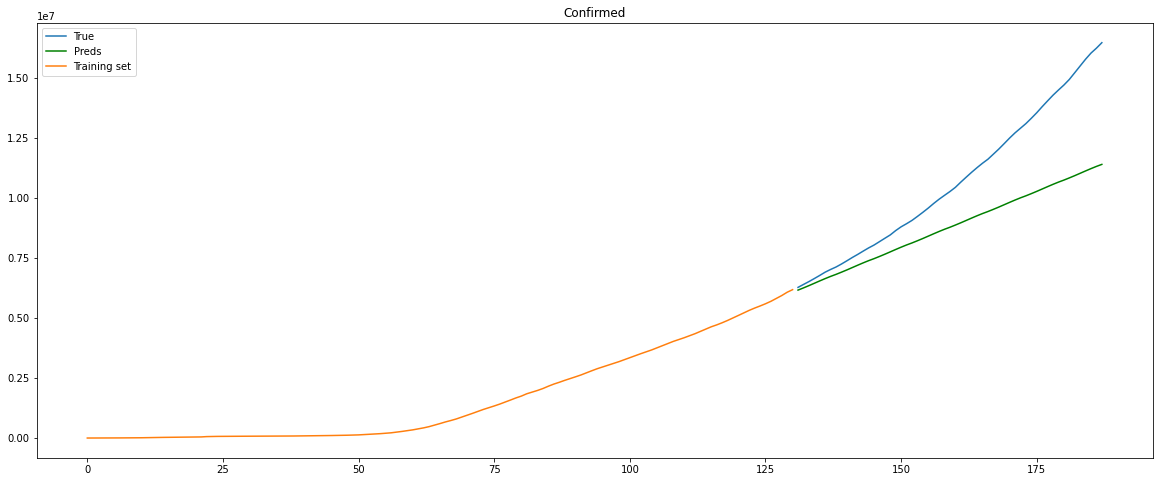

In [57]:
plt.figure(figsize=(20,8))


plt.plot(df_valid[["y"]])
plt.plot(df_valid["Prediction"], color='Green')
plt.plot(df_train[["y"]])
plt.title("Confirmed")
plt.legend(
    ['True',
     'Preds',
     'Training set'],
loc='upper left');

In [58]:
metrics_df = pd.DataFrame(columns=['model', 'dataset', 'valid_metric'])
metrics_df

,model,dataset,valid_metric


In [59]:
from sklearn.metrics import mean_squared_error as mse

rmse_pro = mse(df_valid['Prediction'], df_valid['y']) ** 0.5
rmse_pro

2415358.1491718404

In [60]:
metrics_df = metrics_df.append({
    'model': 'fbprophet',
    'dataset': 'whole df_valid',
    'amount': df_valid.shape[0],
    'valid_metric': rmse_pro
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000


# **One Country**

In [61]:
# df_1 = df[df['Country/Region'] == 'China'][['Date', 'Confirmed']].rename(columns={'Date':'ds','Confirmed':'y'})
# df_1 = df_1.groupby('ds').sum()['y'].reset_index()
# df_1

In [62]:
df_1 = df[df['Country/Region'] == 'US'][['Date', 'Confirmed']].rename(columns={'Date':'ds','Confirmed':'y'})
df_1

,ds,y
223,2020-01-22,1
484,2020-01-23,1
745,2020-01-24,2
1006,2020-01-25,2
1267,2020-01-26,5
...,...,...
47986,2020-07-23,4038816
48247,2020-07-24,4112531
48508,2020-07-25,4178970
48769,2020-07-26,4233923


In [63]:
df_1_train = df_1[df_1['ds'] < val_split]
df_1_valid = df_1[df_1['ds'] >= val_split]

df_1_train.shape, df_1_valid.shape

((131, 2), (57, 2))

In [64]:
pro_1 = Prophet()
pro_1.fit(df_1_train)

preds = pro_1.predict(df_1_valid)

df_1_valid["Prediction"] = preds.yhat.values

df_1_valid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,Prediction
34414,2020-06-01,1816479,1827399.708
34675,2020-06-02,1837374,1849231.631
34936,2020-06-03,1857332,1871547.653
35197,2020-06-04,1878683,1895694.870
35458,2020-06-05,1903907,1920217.323
35719,2020-06-06,1926639,1943587.968
35980,2020-06-07,1944370,1964604.733
36241,2020-06-08,1961785,1985914.736
36502,2020-06-09,1979912,2007746.658
36763,2020-06-10,2000706,2030062.681


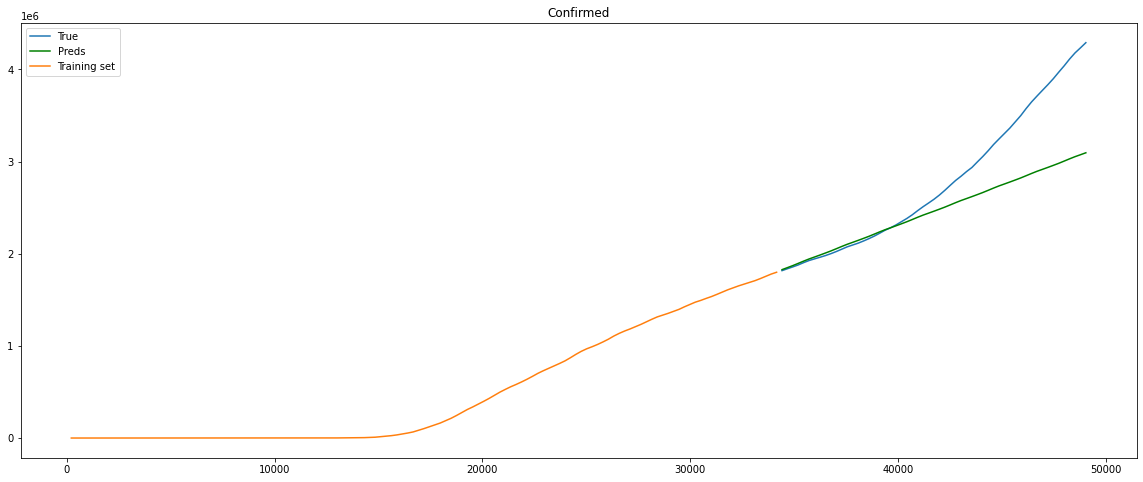

In [65]:
plt.figure(figsize=(20,8))


plt.plot(df_1_valid[["y"]])
plt.plot(df_1_valid["Prediction"], color='Green')
plt.plot(df_1_train[["y"]])
plt.title("Confirmed")
plt.legend(
    ['True',
     'Preds',
     'Training set'],
loc='upper left');

In [66]:
rmse_us = mse(df_1_valid['Prediction'], df_1_valid['y']) ** 0.5
rmse_us

502666.8646057565

In [67]:
metrics_df = metrics_df.append({
    'model': 'fbprophet',
    'dataset': 'df_valid us',
    'amount': df_1_valid.shape[0],
    'valid_metric': rmse_us
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000
1,fbprophet,df_valid us,502666.865,57.000


# **Linear Regression**

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
geometry                geometry
dtype: object

In [69]:
us_df = df[(df['Country/Region'] == 'US')]
us_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,geometry
223,,US,40.000,-100.000,2020-01-22,1,0,0,1,Americas,POINT (-100.00000 40.00000)
484,,US,40.000,-100.000,2020-01-23,1,0,0,1,Americas,POINT (-100.00000 40.00000)
745,,US,40.000,-100.000,2020-01-24,2,0,0,2,Americas,POINT (-100.00000 40.00000)
1006,,US,40.000,-100.000,2020-01-25,2,0,0,2,Americas,POINT (-100.00000 40.00000)
1267,,US,40.000,-100.000,2020-01-26,5,0,0,5,Americas,POINT (-100.00000 40.00000)
...,...,...,...,...,...,...,...,...,...,...,...
47986,,US,40.000,-100.000,2020-07-23,4038816,144430,1233269,2661117,Americas,POINT (-100.00000 40.00000)
48247,,US,40.000,-100.000,2020-07-24,4112531,145560,1261624,2705347,Americas,POINT (-100.00000 40.00000)
48508,,US,40.000,-100.000,2020-07-25,4178970,146465,1279414,2753091,Americas,POINT (-100.00000 40.00000)
48769,,US,40.000,-100.000,2020-07-26,4233923,146935,1297863,2789125,Americas,POINT (-100.00000 40.00000)


In [70]:
df_train = us_df[us_df['Date'] < val_split]
df_valid = us_df[us_df['Date'] >= val_split]
df_valid.shape

(57, 11)

In [71]:
start_date = us_df['Date'].min()
start_date

Timestamp('2020-01-22 00:00:00')

In [72]:
from sklearn.linear_model import LinearRegression


x_train = (df_train['Date'] - start_date).dt.days.to_numpy().reshape(-1, 1)
y_train = df_train['Confirmed']

x_valid = (df_valid['Date'] - start_date).dt.days.to_numpy().reshape(-1, 1)
y_valid = df_valid['Confirmed']

x_train[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [73]:
reg = LinearRegression().fit(x_train, y_train)

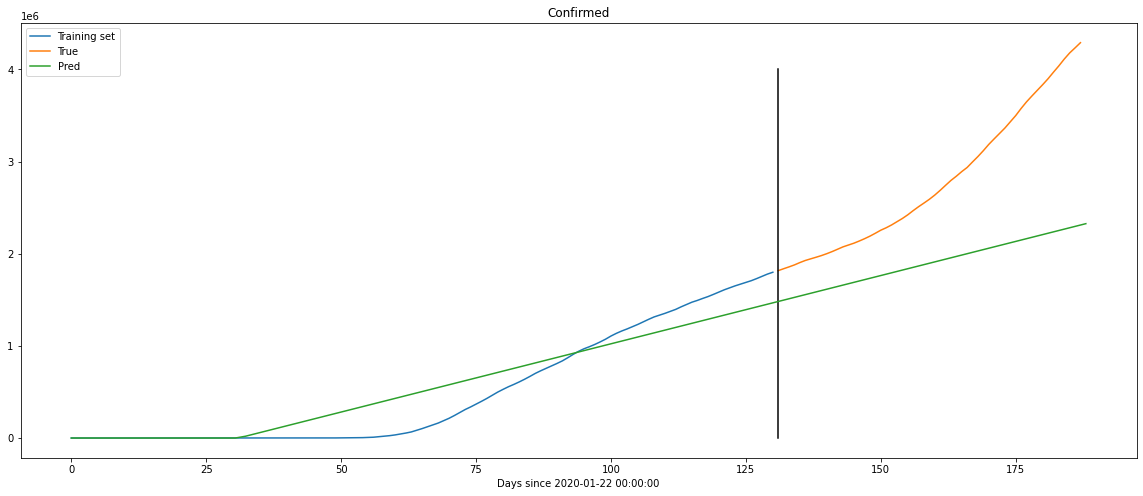

In [74]:
plt.figure(figsize=(20,8))

plt.plot(x_train[:,0], y_train, label='Training set')
plt.plot(x_valid[:,0], y_valid, label='True')

xx = np.linspace(0, len(x_train[:,0]) + df_valid.shape[0], 100)  # Forecast 14 days out
yy = reg.predict(xx.reshape(-1,1))
yy = np.clip(yy, a_min=0, a_max=np.inf)

plt.plot([188 - 57, 188 - 57], [0, 4000000], c='black')

plt.plot(xx, yy, label='Pred')
plt.title('Confirmed')
plt.xlabel(f"Days since {us_df['Date'].min()}")
plt.legend();

In [75]:
rmse_us = mse(reg.predict(x_valid), y_valid) ** 0.5
rmse_us

1019045.9389419494

In [76]:
metrics_df = metrics_df.append({
    'model': 'linreg_1feat',
    'dataset': 'df_valid us',
    'amount': x_valid.shape[0],
    'valid_metric': rmse_us
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000
1,fbprophet,df_valid us,502666.865,57.000
2,linreg_1feat,df_valid us,1019045.939,57.000


# **Polynomial Feateures**

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


pipe = Pipeline([
    ('polynomial', PolynomialFeatures(degree=3)),
    ('modal', LinearRegression())
], verbose=1)

In [78]:
pipe.fit(x_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing polynomial, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing modal, total=   0.0s


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('modal', LinearRegression())],
         verbose=1)

In [79]:
x_train[:3]

array([[0],
       [1],
       [2]])

In [80]:
pipe.named_steps['polynomial'].transform(x_train[:3])

array([[1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 2., 4., 8.]])

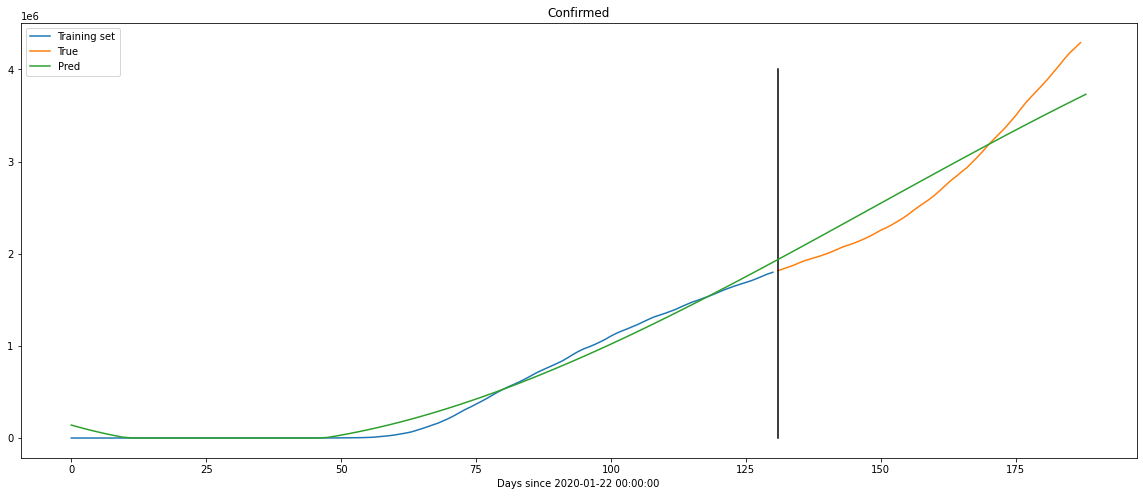

In [81]:
plt.figure(figsize=(20,8))

plt.plot(x_train[:,0], y_train, label='Training set')
plt.plot(x_valid[:,0], y_valid, label='True')

xx = np.linspace(0, len(x_train[:,0]) + df_valid.shape[0], 100)  # Forecast 14 days out
yy = pipe.predict(xx.reshape(-1,1))
yy = np.clip(yy, a_min=0, a_max=np.inf)

plt.plot([188 - 57, 188 - 57], [0, 4000000], c='black')

plt.plot(xx, yy, label='Pred')
plt.title('Confirmed')
plt.xlabel(f"Days since {us_df['Date'].min()}")
plt.legend();

In [82]:
rmse_us = mse(pipe.predict(x_valid), y_valid) ** 0.5
rmse_us

269852.1433184674

In [83]:
metrics_df = metrics_df.append({
    'model': 'linreg_1feat_poly_feat',
    'dataset': 'df_valid us',
    'amount': x_valid.shape[0],
    'valid_metric': rmse_us
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000
1,fbprophet,df_valid us,502666.865,57.000
2,linreg_1feat,df_valid us,1019045.939,57.000
3,linreg_1feat_poly_feat,df_valid us,269852.143,57.000


In [84]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [85]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df['day'] = df['Date'].dt.day

df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,geometry,year,month,week,day
0,,Afghanistan,33.939,67.710,2020-01-22,0,0,0,0,Eastern Mediterranean,POINT (67.70995 33.93911),2020,1,4,22
1,,Albania,41.153,20.168,2020-01-22,0,0,0,0,Europe,POINT (20.16830 41.15330),2020,1,4,22
2,,Algeria,28.034,1.660,2020-01-22,0,0,0,0,Africa,POINT (1.65960 28.03390),2020,1,4,22
3,,Andorra,42.506,1.522,2020-01-22,0,0,0,0,Europe,POINT (1.52180 42.50630),2020,1,4,22
4,,Angola,-11.203,17.874,2020-01-22,0,0,0,0,Africa,POINT (17.87390 -11.20270),2020,1,4,22


In [86]:
features = ['Province/State', 'Country/Region', 'Lat', 'Long', 'year', 'month', 'week', 'day', 'Confirmed', 'Date']

df_2 = df[features]
df_2

,Province/State,Country/Region,Lat,Long,year,month,week,day,Confirmed,Date
0,,Afghanistan,33.939,67.710,2020,1,4,22,0,2020-01-22
1,,Albania,41.153,20.168,2020,1,4,22,0,2020-01-22
2,,Algeria,28.034,1.660,2020,1,4,22,0,2020-01-22
3,,Andorra,42.506,1.522,2020,1,4,22,0,2020-01-22
4,,Angola,-11.203,17.874,2020,1,4,22,0,2020-01-22
...,...,...,...,...,...,...,...,...,...,...
49063,,Sao Tome and Principe,0.186,6.613,2020,7,31,27,865,2020-07-27
49064,,Yemen,15.553,48.516,2020,7,31,27,1691,2020-07-27
49065,,Comoros,-11.646,43.333,2020,7,31,27,354,2020-07-27
49066,,Tajikistan,38.861,71.276,2020,7,31,27,7235,2020-07-27


In [87]:
df_train = df_2[df_2['Date'] < val_split].drop(columns=['Date'])
df_valid = df_2[df_2['Date'] >= val_split].drop(columns=['Date'])

df_train.shape, df_valid.shape

((34191, 9), (14877, 9))

In [88]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_country.fit(df_train['Country/Region'])

df_train['Country/Region'] = le_country.transform(df_train['Country/Region'])
df_valid['Country/Region'] = le_country.transform(df_valid['Country/Region'])

In [89]:
le_country.classes_


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [90]:
le_country.inverse_transform([1])

array(['Albania'], dtype=object)

In [91]:
df_train.head()

,Province/State,Country/Region,Lat,Long,year,month,week,day,Confirmed
0,,0,33.939,67.710,2020,1,4,22,0
1,,1,41.153,20.168,2020,1,4,22,0
2,,2,28.034,1.660,2020,1,4,22,0
3,,3,42.506,1.522,2020,1,4,22,0
4,,4,-11.203,17.874,2020,1,4,22,0


In [92]:
le_state = LabelEncoder()
le_state.fit(df_train['Province/State'])

df_train['Province/State'] = le_state.transform(df_train['Province/State'])
df_valid['Province/State'] = le_state.transform(df_valid['Province/State'])

In [93]:
df_train.head()

,Province/State,Country/Region,Lat,Long,year,month,week,day,Confirmed
0,0,0,33.939,67.710,2020,1,4,22,0
1,0,1,41.153,20.168,2020,1,4,22,0
2,0,2,28.034,1.660,2020,1,4,22,0
3,0,3,42.506,1.522,2020,1,4,22,0
4,0,4,-11.203,17.874,2020,1,4,22,0


In [94]:
X_train = df_train.drop(columns=['Confirmed'])
X_valid = df_valid.drop(columns=['Confirmed'])

y_train = df_train['Confirmed']
y_valid = df_valid['Confirmed']

In [95]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [96]:
rmse = mse(reg.predict(X_valid), y_valid) ** 0.5
rmse

214054.09187195418

In [97]:
metrics_df = metrics_df.append({
    'model': 'linreg_date_features',
    'dataset': 'whole df_valid',
    'amount': X_valid.shape[0],
    'valid_metric': rmse
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000
1,fbprophet,df_valid us,502666.865,57.000
2,linreg_1feat,df_valid us,1019045.939,57.000
3,linreg_1feat_poly_feat,df_valid us,269852.143,57.000
4,linreg_date_features,whole df_valid,214054.092,14877.000


In [98]:
df_albania = df[df['Country/Region'] == 'Albania'][features]
df_albania

,Province/State,Country/Region,Lat,Long,year,month,week,day,Confirmed,Date
1,,Albania,41.153,20.168,2020,1,4,22,0,2020-01-22
262,,Albania,41.153,20.168,2020,1,4,23,0,2020-01-23
523,,Albania,41.153,20.168,2020,1,4,24,0,2020-01-24
784,,Albania,41.153,20.168,2020,1,4,25,0,2020-01-25
1045,,Albania,41.153,20.168,2020,1,4,26,0,2020-01-26
...,...,...,...,...,...,...,...,...,...,...
47764,,Albania,41.153,20.168,2020,7,30,23,4466,2020-07-23
48025,,Albania,41.153,20.168,2020,7,30,24,4570,2020-07-24
48286,,Albania,41.153,20.168,2020,7,30,25,4637,2020-07-25
48547,,Albania,41.153,20.168,2020,7,30,26,4763,2020-07-26


In [99]:
df_albania['Country/Region'] = le_country.transform(df_albania['Country/Region'])
df_albania['Province/State'] = le_state.transform(df_albania['Province/State'])
df_albania

,Province/State,Country/Region,Lat,Long,year,month,week,day,Confirmed,Date
1,0,1,41.153,20.168,2020,1,4,22,0,2020-01-22
262,0,1,41.153,20.168,2020,1,4,23,0,2020-01-23
523,0,1,41.153,20.168,2020,1,4,24,0,2020-01-24
784,0,1,41.153,20.168,2020,1,4,25,0,2020-01-25
1045,0,1,41.153,20.168,2020,1,4,26,0,2020-01-26
...,...,...,...,...,...,...,...,...,...,...
47764,0,1,41.153,20.168,2020,7,30,23,4466,2020-07-23
48025,0,1,41.153,20.168,2020,7,30,24,4570,2020-07-24
48286,0,1,41.153,20.168,2020,7,30,25,4637,2020-07-25
48547,0,1,41.153,20.168,2020,7,30,26,4763,2020-07-26


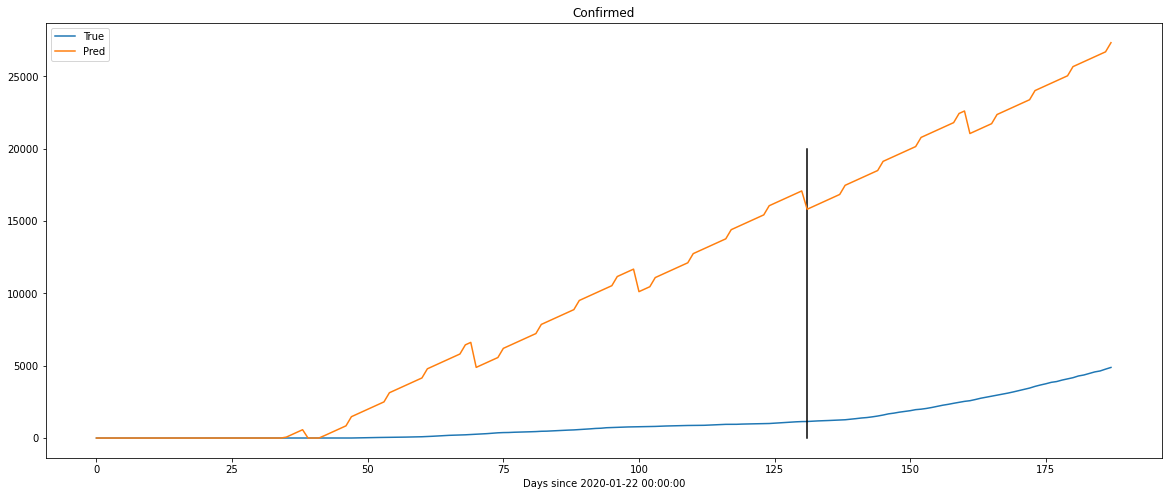

In [100]:
plt.figure(figsize=(20,8))

plt.plot(df_albania['Confirmed'].values, label='True')

yy = reg.predict(df_albania.drop(columns=['Confirmed', 'Date']))
yy = np.clip(yy, a_min=0, a_max=np.inf)

plt.plot([188 - 57, 188 - 57], [0, 20000], c='black')

plt.plot(yy, label='Pred')
plt.title('Confirmed')
plt.xlabel(f"Days since {us_df['Date'].min()}")
plt.legend();

# **Decision Tree**

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=5)

tree.fit(X_train, y_train)

print(mse(tree.predict(X_train), y_train) ** 0.5)
print(mse(tree.predict(X_valid), y_valid) ** 0.5)

0.0
131927.48984165053


In [102]:
tree = DecisionTreeRegressor(random_state=5,
                             max_depth=8,
                             min_samples_leaf=12)

tree.fit(X_train, y_train)

print(mse(tree.predict(X_train), y_train) ** 0.5)
rmse = mse(tree.predict(X_valid), y_valid) ** 0.5
print(rmse)

11355.327252864769
129603.0562447614


In [103]:
metrics_df = metrics_df.append({
    'model': 'tree_date_features',
    'dataset': 'whole df_valid',
    'amount': X_valid.shape[0],
    'valid_metric': rmse
}, ignore_index=True)

metrics_df

,model,dataset,valid_metric,amount
0,fbprophet,whole df_valid,2415358.149,57.000
1,fbprophet,df_valid us,502666.865,57.000
2,linreg_1feat,df_valid us,1019045.939,57.000
3,linreg_1feat_poly_feat,df_valid us,269852.143,57.000
4,linreg_date_features,whole df_valid,214054.092,14877.000
5,tree_date_features,whole df_valid,129603.056,14877.000


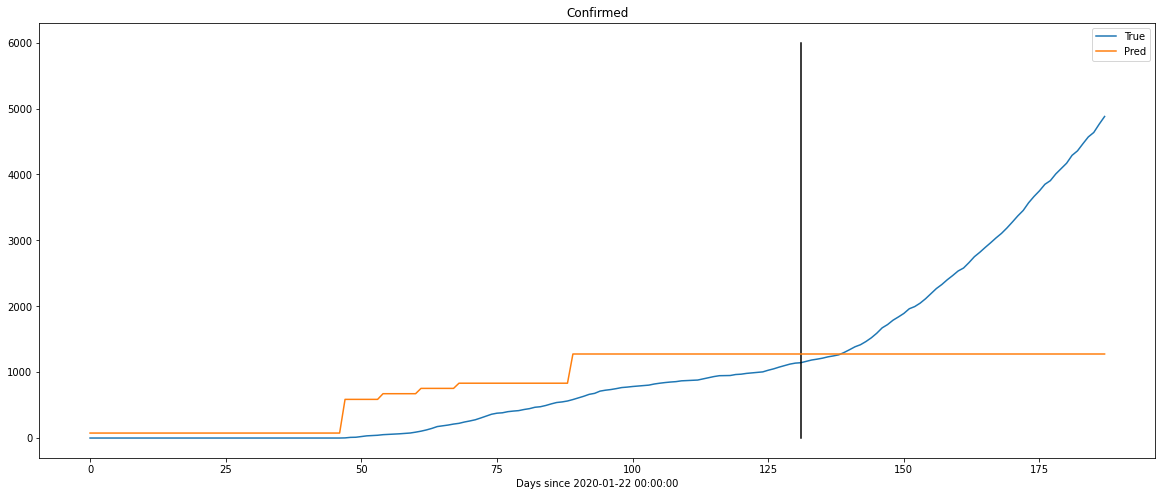

In [104]:
plt.figure(figsize=(20,8))

plt.plot(df_albania['Confirmed'].values, label='True')

yy = tree.predict(df_albania.drop(columns=['Confirmed', 'Date']))
yy = np.clip(yy, a_min=0, a_max=np.inf)

plt.plot([188 - 57, 188 - 57], [0, 6000], c='black')

plt.plot(yy, label='Pred')
plt.title('Confirmed')
plt.xlabel(f"Days since {us_df['Date'].min()}")
plt.legend();